# Health - Cancer Imune System
Description:Explain the immune reaction after chemotherapy&antibody treatment?

## Read data files
There are 2 data sources available: 
    <br>-FIRE3_final_df.txt- containing gene expression for 453 patience
    <br>-FIRE3_Heike_set_new.sav-clinical data for 735 patience
    <br>-CIBERSORTx_Job7_Results - Imune Cells presence obtained by transforming the gene expression using Stanford CybersortX model (https://cibersortx.stanford.edu/runcibersortx.php) 

In [1]:
#Gene Expression data file
import pandas as pd
gene_df = pd.read_csv("../raw_data/FIRE3_final_df.txt",sep=' ')

#Clinical data file
import pyreadstat
clinical_df, meta = pyreadstat.read_sav("../raw_data/FIRE3_Heike_set_new.sav")

# Stanford CybersortX model output
immune_df = pd.read_csv("../raw_data/CIBERSORTx_Job7_Results.txt",sep='\t')

## DataFrame overview

In [2]:
#Gene Expression Dataframe
gene_df.head(3)

,entrezid,gsymbol,1,4,5,9,10,11,12,15,...,838,840,842,843,889,892,896,897,899,900
1,503538,A1BG-AS1,6.073786,4.856430,4.258748,4.850635,4.670916,6.680079,7.299947,6.021905,...,5.249598,6.113905,6.336825,5.804863,5.206533,5.251891,6.382205,4.889634,6.272591,5.233233
2,1,A1BG,4.780956,4.530789,4.630758,4.775249,4.767542,4.823468,4.705230,5.004281,...,4.908360,4.684136,4.757578,4.688623,4.678426,4.520686,4.681386,5.266437,4.840969,4.518457
3,29974,A1CF,5.478749,6.238209,6.518094,5.710002,6.714567,5.481425,5.273707,6.228988,...,5.204422,6.318736,6.295239,5.566774,6.213009,6.052655,5.877622,4.762273,5.170994,5.635175


In [3]:
#Clinical Data Dataframe
clinical_df.head(10)

,study,pat_nr,CET1_REST0,arm,sex,age,ecog,skin_rash,MOL_SG,RNA_Probe,...,orr1,dpr1,ets_cat,SYNCH_META,PRIMARY_RES,RADIOVORHER,LK,AP,CTX_ADJ,filter_$
0,FIRE 3,1.0,0.0,2.0,2.0,60.0,0.0,0.0,3.0,1.0,...,1.0,NaN,NaN,2.0,1.0,1.0,2.0,1.0,1.0,1.0
1,FIRE 3,2.0,1.0,1.0,2.0,52.0,1.0,0.0,NaN,0.0,...,0.0,NaN,NaN,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2,FIRE 3,3.0,1.0,1.0,2.0,52.0,1.0,0.0,NaN,0.0,...,1.0,NaN,NaN,2.0,1.0,1.0,1.0,1.0,1.0,0.0
3,FIRE 3,4.0,0.0,2.0,1.0,58.0,0.0,0.0,3.0,1.0,...,1.0,NaN,0.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0
4,FIRE 3,5.0,0.0,2.0,2.0,54.0,0.0,0.0,1.0,1.0,...,1.0,NaN,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
5,FIRE 3,6.0,0.0,2.0,1.0,49.0,0.0,0.0,3.0,0.0,...,1.0,NaN,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0
6,FIRE 3,7.0,1.0,1.0,1.0,67.0,1.0,0.0,NaN,0.0,...,0.0,NaN,1.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0
7,FIRE 3,8.0,1.0,1.0,1.0,59.0,1.0,1.0,3.0,0.0,...,0.0,NaN,NaN,1.0,0.0,0.0,2.0,1.0,0.0,0.0
8,FIRE 3,9.0,1.0,1.0,1.0,61.0,0.0,1.0,6.0,1.0,...,1.0,NaN,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0
9,FIRE 3,10.0,1.0,1.0,1.0,74.0,0.0,1.0,1.0,1.0,...,0.0,NaN,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0


In [4]:
# Imune Cells Dataframe-CybersortX model output
immune_df.head(3)

,Mixture,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Correlation,RMSE,Unnamed: 26,Unnamed: 27
0,1,"0,0406","0,0000","0,2091","0,1229","0,0000","0,0885","0,0000","0,1118","0,0526",...,"0,0081","0,0000","0,0456","0,0000","0,1193","0,0240","0,1671",101.292.493.972.966,NaN,"1,0000"
1,4,"0,0491","0,0000","0,1218","0,0770","0,0000","0,1533","0,0511","0,0686","0,0596",...,"0,0000","0,0000","0,1710","0,0000","0,0220","0,0300","0,1614",101.814.343.055.271,NaN,"1,0000"
2,5,"0,0032","0,0000","0,1627","0,0422","0,0000","0,2405","0,0000","0,0000","0,0183",...,"0,0000","0,0000","0,1404","0,0000","0,1120","0,0480","0,1490",102.981.282.715.409,NaN,"1,0000"


## EDA Clinical data

### Correlation Matrix

<AxesSubplot:>

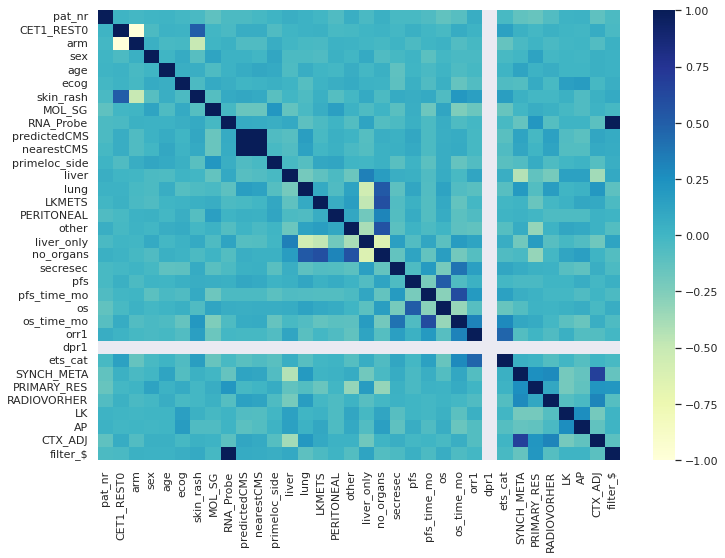

In [5]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Heatmap
corr = clinical_df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

In [6]:
skinn_rash_df=clinical_df[clinical_df['skin_rash']==1]

### Positive correlated features with skin rash

In [7]:
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df=corr_df[corr_df['feature_2']=='skin_rash']
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation

#Positive correlated features with rash
corr_df.head(5)

,feature_1,feature_2,correlation
40,CET1_REST0,skin_rash,0.501703
788,os_time_mo,skin_rash,0.196541
890,ets_cat,skin_rash,0.156574
822,orr1,skin_rash,0.155253
312,predictedCMS,skin_rash,0.097630


### Negative corelated features with skin rash

In [10]:
corr_df.tail(5)

,feature_1,feature_2,correlation
516,PERITONEAL,skin_rash,-0.082289
108,sex,skin_rash,-0.087775
380,primeloc_side,skin_rash,-0.098279
74,arm,skin_rash,-0.501703
856,dpr1,skin_rash,NaN


In [11]:
import plotly.express as px
tips = px.data.tips()
fig = px.scatter(tips, x="total_bill", y="tip", size="size", color="smoker")
fig.show()

<AxesSubplot:xlabel='age'>

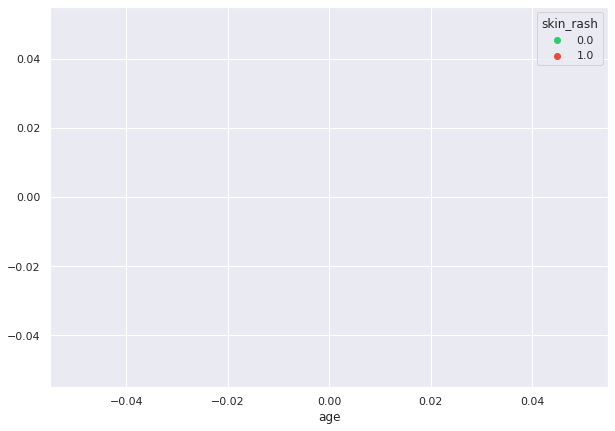

In [23]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x="age", hue='skin_rash',
                palette=sns.color_palette(["#2ecc71", "#e74c3c"]),
                sizes=(10, 300), data=clinical_df)

In [22]:
clinical_df.iloc[:,2].name

'CET1_REST0'

In [13]:
clinical_df.describe()

,pat_nr,CET1_REST0,arm,sex,age,ecog,skin_rash,MOL_SG,RNA_Probe,predictedCMS,...,orr1,dpr1,ets_cat,SYNCH_META,PRIMARY_RES,RADIOVORHER,LK,AP,CTX_ADJ,filter_$
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,589.000000,735.000000,404.000000,...,735.000000,0.0,559.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.00000,735.000000
mean,413.940136,0.507483,1.492517,1.321088,62.832653,0.489796,0.227211,2.042445,0.601361,2.747525,...,0.564626,NaN,0.533095,1.274830,0.846259,0.182313,1.425850,1.127891,0.22449,0.601361
std,250.075943,0.500284,0.500284,0.467213,8.774686,0.544571,0.419315,1.491438,0.489952,1.073303,...,0.496144,NaN,0.499350,0.446733,0.360946,0.666000,0.494808,0.334196,0.41753,0.489952
min,1.000000,0.000000,1.000000,1.000000,27.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,NaN,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000
25%,195.500000,0.000000,1.000000,1.000000,57.000000,0.000000,0.000000,1.000000,0.000000,2.000000,...,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.00000,0.000000
50%,407.000000,1.000000,1.000000,1.000000,64.000000,0.000000,0.000000,1.000000,1.000000,2.500000,...,1.000000,NaN,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.00000,1.000000
75%,623.500000,1.000000,2.000000,2.000000,70.000000,1.000000,0.000000,3.000000,1.000000,4.000000,...,1.000000,NaN,1.000000,2.000000,1.000000,0.000000,2.000000,1.000000,0.00000,1.000000
max,900.000000,1.000000,2.000000,2.000000,79.000000,2.000000,1.000000,6.000000,1.000000,4.000000,...,1.000000,NaN,1.000000,2.000000,1.000000,9.000000,2.000000,2.000000,1.00000,1.000000


In [8]:
clinical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   study           735 non-null    object 
 1   pat_nr          735 non-null    float64
 2   CET1_REST0      735 non-null    float64
 3   arm             735 non-null    float64
 4   sex             735 non-null    float64
 5   age             735 non-null    float64
 6   ecog            735 non-null    float64
 7   skin_rash       735 non-null    float64
 8   MOL_SG          589 non-null    float64
 9   RNA_Probe       735 non-null    float64
 10  predictedCMS    404 non-null    float64
 11  nearestCMS      460 non-null    float64
 12  detaiL_primloc  735 non-null    object 
 13  primeloc_side   729 non-null    float64
 14  liver           735 non-null    float64
 15  lung            735 non-null    float64
 16  LKMETS          735 non-null    float64
 17  PERITONEAL      735 non-null    flo

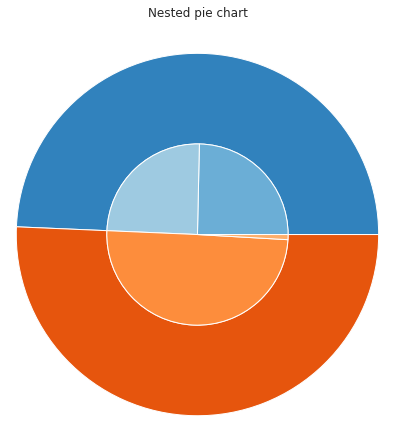

In [9]:
from matplotlib import pyplot as plt 
import numpy as np 
  
  
size = 2
cars = ['Cetuximab', 'Bevacizumab'] 
  
data = np.array([[109, 109],[220, 4]]) 
  
norm = data / np.sum(data)*2 * np.pi 
  
left = np.cumsum(np.append(0,  
                           norm.flatten()[:-1])).reshape(data.shape) 
  
cmap = plt.get_cmap("tab20c") 
outer_colors = cmap(np.arange(6)*4) 
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 
                              10, 12, 13, 15, 
                              17, 18, 20 ])) 

  
fig, ax = plt.subplots(figsize =(10, 7), subplot_kw = dict(polar = True)) 
  
ax.bar(x = left[:, 0], 
       width = norm.sum(axis = 1), 
       bottom = 1-size, 
       height = size, 
       color = outer_colors,  
       edgecolor ='w', 
       linewidth = 1, 
       align ="edge") 
  
ax.bar(x = left.flatten(), 
       width = norm.flatten(), 
       bottom = 1-2 * size, 
       height = size, 
       color = inner_colors, 
       edgecolor ='w', 
       linewidth = 1, 
       align ="edge") 
  
ax.set(title ="Nested pie chart") 
ax.set_axis_off() 
  
plt.show()

## EDA immune data


## Unsupervised learning
Cluster the data using KMeans model to predict how a patient will respond to the treatment (rash/non-rash)
Compare the results of the model with actual data

## Supervised model
Linear regreasion to predict 